# Netflix EDA
performing Exploratoty data analysis to understand the dataset and hidden information about data.

# Tasks/objectives
- Understand the dataset, types and missing values
* clean the dataset and handle the missing values
- perform Data Visualization
* Creat Final Summary Report

In [1]:
# importing libraries
import numpy as np #helps in working with arrays and matrices
import pandas as pd #helps in reading datasets/making dataframes/manipulating dataframes
import seaborn as sns #helps us to visualize datasets
import matplotlib.pyplot as plt

In [2]:
# reading our dataset
netflix_data = pd.read_csv("C:/Users/RADHA KR/Desktop/netflix_titles.csv")
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
netflix_data.shape #tell us the rows and columns of the dataset

(8807, 12)

In [4]:
netflix_data.describe() #it shows the valid no. of values for a column among the rows and used to view some basic stats of a dataframe.

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [5]:
netflix_data.info() #shows us the count and datatypes of our columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### Missing Values

In [6]:
netflix_data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

## Dataframe Metadata changes

### Adjust data types and fill in missing values.
##### The following do not require any fills :
+ type
- title
+ release_year
- listed_in
+ description

##### The following have missing data :
- duration 
+ rating
- data_added
+ cast
- country
+ director

##### check data types, update types where needed and proceed.
######  check data_added to be updated to datetime 'unavailable' will be substituted in for any nulls of field with object/string datatypes. this applies to everything except for release_year 

Update date_added to datetime and check

In [7]:
#convert the data type from object to datetime64
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'])

In [8]:
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Handling Missing Values

rating,cast,country,and director have the nulls filled with 'unavailable'

In [9]:
netflix_data.fillna({'rating':'unavailable','cast':'unavailable','country':'unavailable','director':'unavailable'},inplace = True)
netflix_data.isna().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         3
listed_in        0
description      0
dtype: int64

For nulls in date_added,missing date added is to be substituted in with the most recent date from date_added.\This is because Netflix has the tendency to add more content over time.\\Other viable options would be finding actual dates and inputting them manually or dropping the data from results since the amount of missing data is rather small.

In [10]:
#where the value is missing in date_added column
netflix_data[netflix_data.date_added.isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,unavailable,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaT,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,unavailable,Anthony Bourdain,United States,NaT,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,unavailable,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaT,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,unavailable,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaT,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,unavailable,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaT,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,unavailable,Igor Dmitriev,unavailable,NaT,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,unavailable,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaT,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,unavailable,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaT,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,unavailable,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaT,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,unavailable,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaT,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [11]:
#replace the null values in date_added column to most most recent date
most_recent_entry_date = netflix_data['date_added'].max()
netflix_data.fillna({'date_added' : most_recent_entry_date},inplace = True)

In [12]:
netflix_data.date_added.isnull().sum()

0

no any null values in date_added in dataframe

In [13]:
netflix_data [netflix_data.show_id == 's6067'] #checking the null values is replaced by most recent date of the column date_added.

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,unavailable,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,2021-09-25,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


### Additional data cleansing

#### Durations data input error

In [14]:
netflix_data[netflix_data.duration.isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


The missing durations are all movies by Louis C.K. Normally, we would likely fill the duration with the mean duration of movies from the table. In this case it appears that the actual duration was input in the rating column, so one solution is to move the rating data into the duration and make the rating information 'unavailable' like the other nulls.

In [15]:
#check to make sure there is no other content with the sam director to avoid accidental overwritting 
netflix_data[netflix_data.director == 'Louis C.K.']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [16]:
#loc helps us easily accessing the columns by names
netflix_data.loc[netflix_data['director'] == 'Louis C.K.' , 'duration'] = netflix_data['rating']
netflix_data[netflix_data.director == 'Louis C.K.']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,66 min,Movies,The comic puts his trademark hilarious/thought...


In [17]:
netflix_data.loc[netflix_data['director'] == 'Louis C.K.','rating'] = 'unavailable'
netflix_data[netflix_data.director == 'Louis C.K.']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,unavailable,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,unavailable,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,unavailable,66 min,Movies,The comic puts his trademark hilarious/thought...


## Visualizations

Take a look at what types of shows that has been watched on Netflix.

In [18]:
netflix_data.type.value_counts() #value_count method shows the counts of different categories in a given column 

Movie      6131
TV Show    2676
Name: type, dtype: int64

Text(0.5, 1.0, 'count vs type of shows')

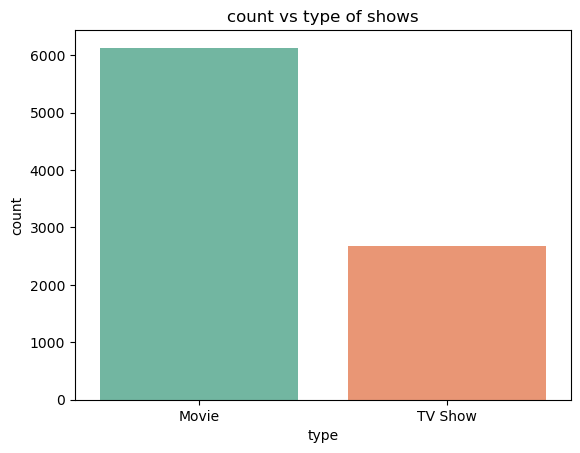

In [19]:
#countplot helps us to plot counts of each category
#countplot() function is used to analyze the relationships between count and a caregorical group of values together.
sns.countplot(x='type', data = netflix_data , palette = 'Set2')
plt.title('count vs type of shows')

Here by this graph, it shows clearly that there are more no of movies as compared to TV shows on Netflix.

### Country Analysis

In [20]:
netflix_data.country.value_counts()

United States                             2818
India                                      972
unavailable                                831
United Kingdom                             419
Japan                                      245
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 749, dtype: int64

checking the type of content based on country by countplot function in seaborn library.

Text(0.5, 1.0, 'Top 10 country wise content produced on Netflix')

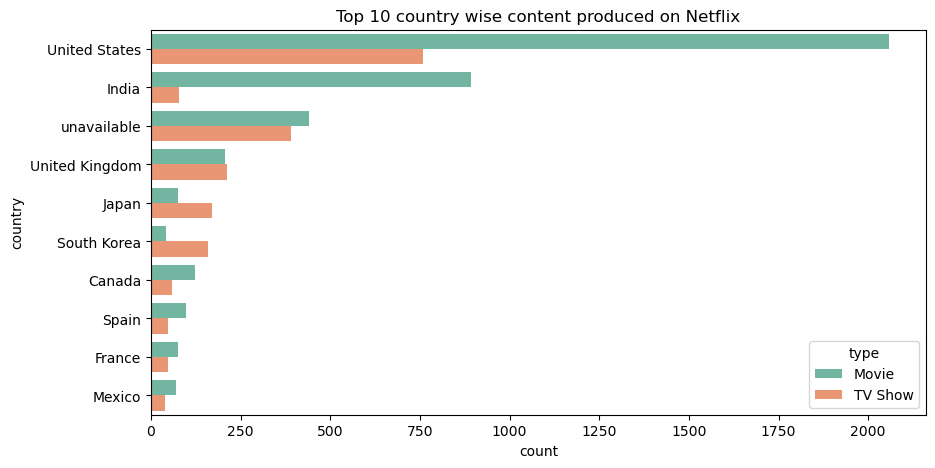

In [21]:
plt.figure(figsize = (10,5)) #setting the figure suze.
sns.countplot(y='country',order = netflix_data.country.value_counts().index[0:10],data = netflix_data,palette = 'Set2',hue = 'type')
plt.title('Top 10 country wise content produced on Netflix')

Check what are thr major ratings given to Netflix Shows.

In [22]:
netflix_data .rating.value_counts()

TV-MA          3207
TV-14          2160
TV-PG           863
R               799
PG-13           490
TV-Y7           334
TV-Y            307
PG              287
TV-G            220
NR               80
G                41
unavailable       7
TV-Y7-FV          6
NC-17             3
UR                3
Name: rating, dtype: int64

Text(0.5, 1.0, 'Ratings of Shows on Netflix Vs Count')

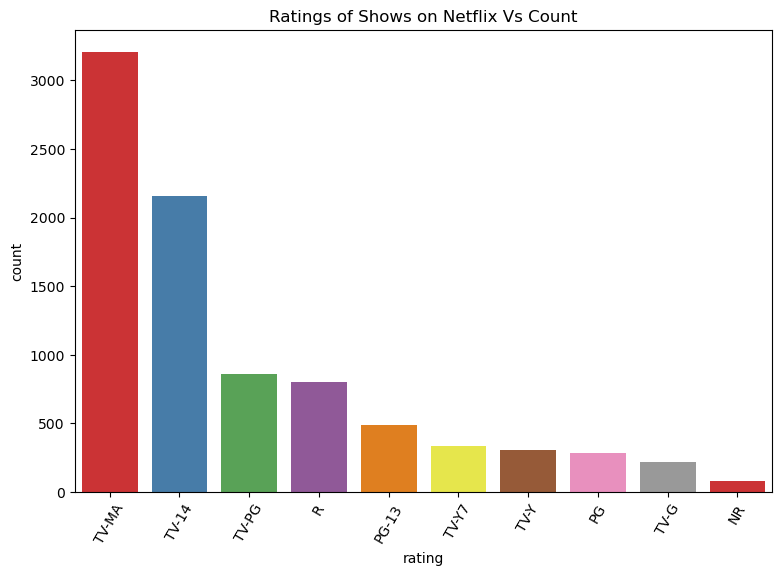

In [23]:
plt.figure(figsize = (9,6))
sns.countplot(x = 'rating' , order = netflix_data.rating.value_counts().index[0:10],data = netflix_data,palette = 'Set1')
plt.xticks(rotation = 60)
plt.title('Ratings of Shows on Netflix Vs Count')

Most of the Shows has TV-MA and TV-14 ratings.

Text(0.5, 1.0, 'Ratings of Shows on Netflix Vs Count')

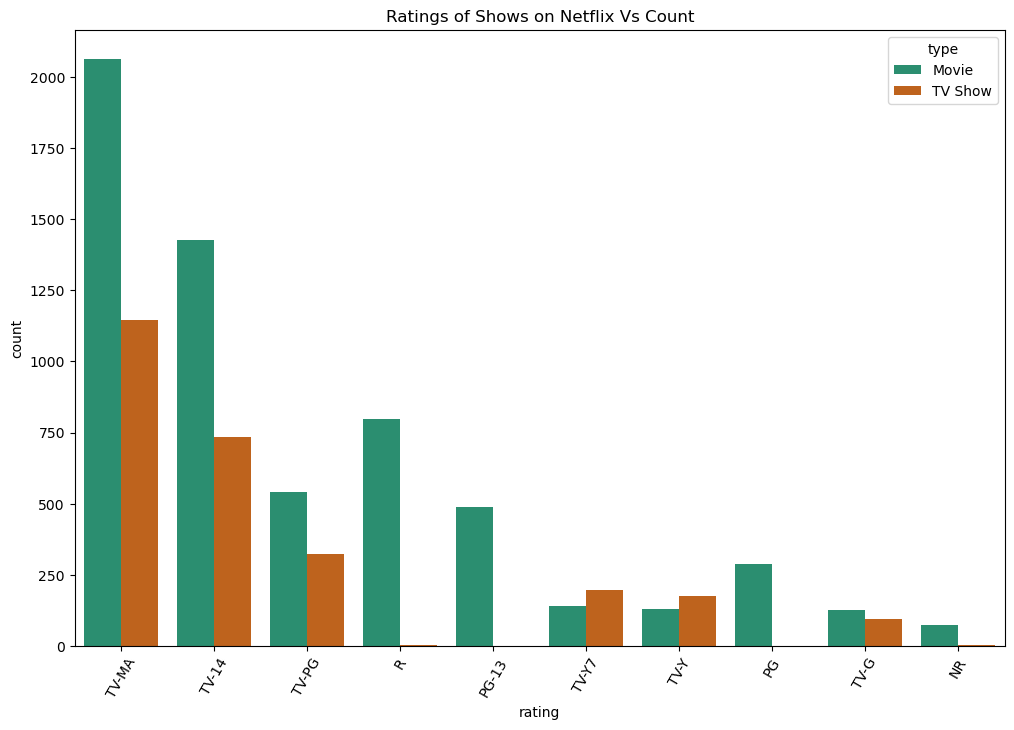

In [24]:
#checking the above plot of ratings of shows on Netflix differentiating with their type.
plt.figure(figsize = (12,8))
sns.countplot(x = 'rating' , order = netflix_data.rating.value_counts().index[0:10],data = netflix_data,palette = 'Dark2',hue = 'type')
plt.xticks(rotation = 60)
plt.title('Ratings of Shows on Netflix Vs Count')

In [25]:
netflix_data.release_year.value_counts()[:20]

2018    1147
2017    1032
2019    1030
2020     953
2016     902
2021     592
2015     560
2014     352
2013     288
2012     237
2010     194
2011     185
2009     152
2008     136
2006      96
2007      88
2005      80
2004      64
2003      61
2002      51
Name: release_year, dtype: int64

Text(0.5, 1.0, 'Content Release in years on Netflix Vs Count')

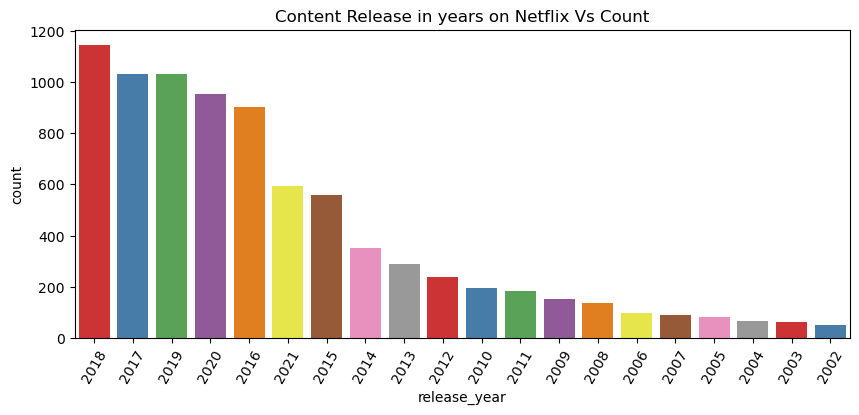

In [26]:
plt.figure(figsize = (10,4))
sns.countplot(x = 'release_year', order = netflix_data.release_year.value_counts().index[0:20],data = netflix_data,palette = 'Set1')
plt.xticks(rotation = 60)
plt.title('Content Release in years on Netflix Vs Count')

### Popular Genres Analysis

Text(0.5, 1.0, 'Top 20 Genres on Netflix')

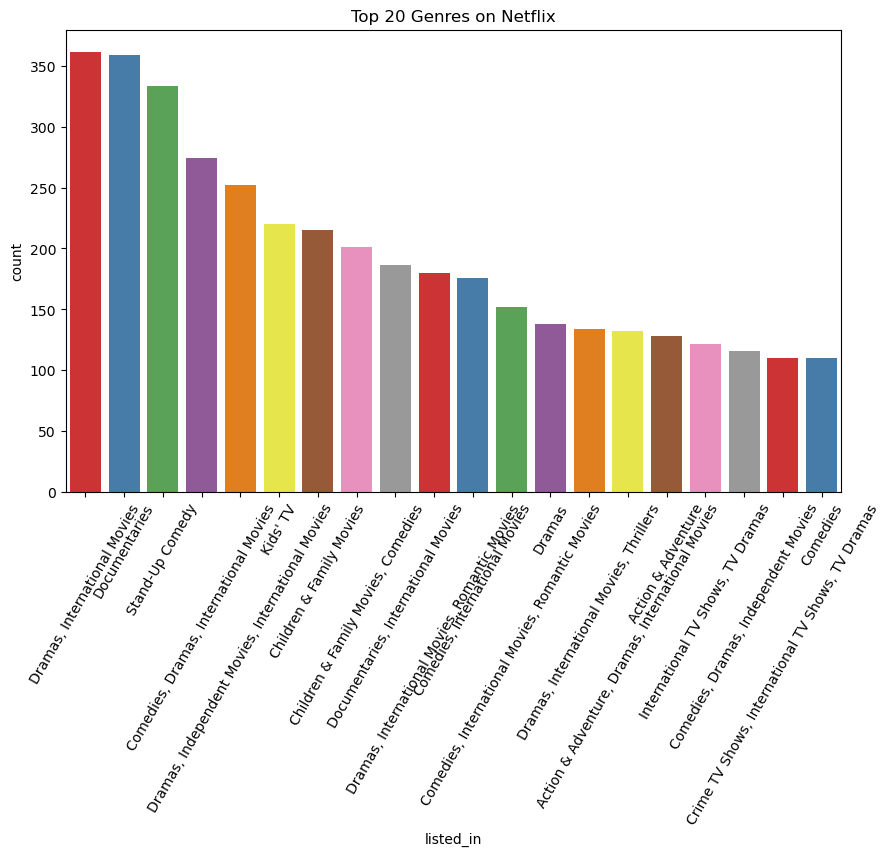

In [27]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'listed_in', order = netflix_data.listed_in.value_counts().index[0:20],data = netflix_data,palette = 'Set1')
plt.xticks(rotation = 60)
plt.title('Top 20 Genres on Netflix')

## Summary of This Project

#### we had performed lots of operations over the dataset to dig out some very useful information from it. The conclusion of the dataset are :

- Netflix has more Movies than TV Shows.
+ Most number of Movies and TV Shows are produced by United States, followed by India who has produced the second most number of Movies on Netflix.
+ Most of the content on Netflix (Movies and TV Shows combined) are for Mature Audiences.
+ 2018 is the year in which Netflix released a lot more content as compared to other years.
+ International Movies and Dramas are the most popular Genres on Netflix.